# Linear Regression to Predict Height From Weight

We start with linenar regression because it is easy to understand, and can help us develop intuitions about the key concepts of machine learning. You may have already learned about linear regression, or used it in your job. The reason that linear regression is also considered machine learning is that
- It is trained using data, and improves as more data is available.
- It is used for prediction and forecasting
- It is part of the repertoire of models that you should have at your disposal when weighing which model to use in machine learning.


The linear regression model assumes the data exhibits a linear relationship of the form:
```
y =  mx + b
```
where
- `y` = the dependent variable
- `x` = the indepedent variable
- `m` = the slope
- `b` = the intercept, or the value of `y` when `x` = 0

**Given a set of input data, linear regression is used to find the parameters `m` and `b` that best fit the data. This is an optimization problem.** What is considered "best fit" is beyond the scope of this lab. You can easily find the actual algorithms online. 


This lab is designed to show:
- How to train a linear regression model
- The amount of data used for training affects the quality of the model
- The importance of selecting the correct model for your data

## The Data

For this lab, we are using a model that assumes a linear relationship between weight and height. 
The data was collected from the [!Kung tribe](https://en.wikipedia.org/wiki/%C7%83Kung_people), and available at the following [github page](https://github.com/rmcelreath/rethinking/blob/master/data/Howell1.csv)


## Read data into Python array

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("data/Howell1.csv", sep=";")
df = pd.DataFrame(data)
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


## Transform Input Array

The next step is to create the independent and dependent variables from the input

In [3]:
# X is the independent variables. 
X = df.drop('height', axis=1)
X.head()

,weight,age,male
0,47.825606,63.0,1
1,36.485807,63.0,0
2,31.864838,65.0,0
3,53.041915,41.0,1
4,41.276872,51.0,0


In [4]:
# y is the dependent variable
y = df['height']
y.head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

# Train the model with a small set of data

In the first try, we will use only 5% of the data to train the model. This is used to demonstrate model behavior when the training set is small.

In [5]:
# test_size = 0.95 means 1-0.95 or 5% is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=0)
lin_reg = LinearRegression()
reg = lin_reg.fit(X_train, y_train)

# Our model is the in the form of a line.
# After training, the parameters of the line y = mx + b are:
#  m = req.coef_[0], 
#  b = req.intercept_
# Let's define two points on the line so we can plot it:
print('m: ', reg.coef_[0], "b: ", reg.intercept_)
x0 = 0
y0 = reg.intercept_
x1 = 70
y1 = reg.coef_[0]* x1 + y0

m:  1.2986222301399701 b:  91.45565952606745


## Plot the training data and the model

Note that:
- With the small set of training data, a line appears to be a good fit
- You can use the line to predict the height based on any weight. For example, what does the model predict for the height when weight is 70?

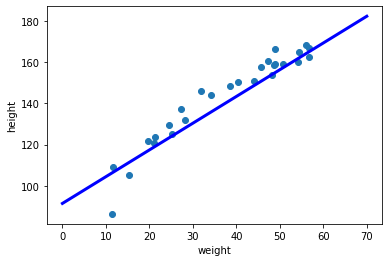

In [6]:
axes1 = plt.axes(label="training 1")
axes1.set_xlabel('weight')
axes1.set_ylabel('height')
axes1.scatter(X_train['weight'], y_train)
axes1.plot( [x0, x1], [y0, y1], color='blue', linewidth = 3)
plt.show()

## Train the Model with Representative Set of Data

In this second try, we will train the model with 50% of the data. This is more representative of the population.

Note how the parameters of the model have changed based on more data.

In [7]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5, random_state=0)
lin_reg1 = LinearRegression()
reg1 = lin_reg.fit(X_train1, y_train1)
print('m: ', reg1.coef_[0], 'b: ', reg1.intercept_)
x0_1 = 0
y0_1 = reg1.intercept_
x1_1 = 70
y1_1 = reg1.coef_[0]* x1_1 + y0_1

m:  1.662784928234774 b:  75.05407729895278


## Plot the Representative Training Data with Revised Model


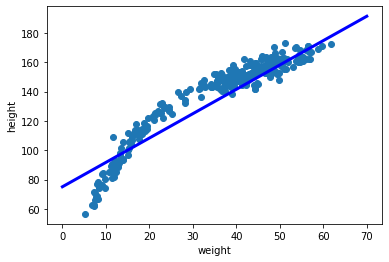

In [8]:
axes2 = plt.axes(label="training 2")
axes2.set_xlabel('weight')
axes2.set_ylabel('height')
axes2.scatter(X_train1['weight'], y_train1)
axes2.plot( [x0_1, x1_1], [y0_1, y1_1], color='blue', linewidth = 3)
plt.show()

## Additional Activities and Discussions

- Is a linear model the right model for this data?  If not, what's a better model?
- How do you evaluate what's a good model?
- How is model training different from programming?
- Re-run the lab with different training set sizes to see how the model changes.
- Read more about [regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)
